📌 ADF Test Statistic: -0.7322306420914302
📌 p-value: 0.8382235332928436


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


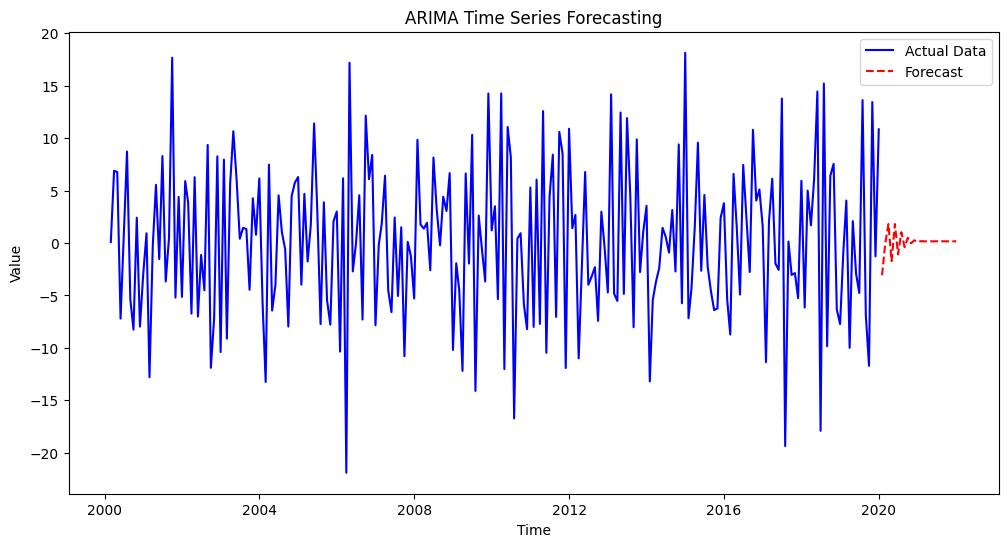

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Generate Synthetic Time Series Data
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='ME')  # Use 'ME' instead of 'M'
np.random.seed(42)

trend = np.linspace(10, 50, 240)
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))
noise = np.random.normal(scale=5, size=240)

data = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Value': data})
df.set_index('Date', inplace=True)

# Step 2: Check Stationarity (ADF Test)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Value'])
print("📌 ADF Test Statistic:", result[0])
print("📌 p-value:", result[1])

# Apply Differencing if p-value > 0.05 (Non-stationary Data)
if result[1] > 0.05:
    df['Value'] = df['Value'].diff().dropna()

# Step 3: Train ARIMA Model
model = ARIMA(df['Value'].dropna(), order=(2,1,2))  # (p,d,q)
arima_model = model.fit()

# Step 4: Forecast Future Values
forecast_steps = 24  # Predict next 24 months
forecast = arima_model.forecast(steps=forecast_steps)

# **Fix x-axis mismatch issue**
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Step 5: Plot Results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Value'], label="Actual Data", color='blue')
plt.plot(forecast_index, forecast, label="Forecast", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("ARIMA Time Series Forecasting")
plt.legend()
plt.show()
